Dataset utilizado: https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
    
    - O dataset é publico
    - ele tem aproximadamente 2GB
    - contém 7568062 registros
    - contém 22 features

#### Dicionário de dados

- **ID** 

    - Unique identifier for the record.
    - Identificador exclusivo para o registro.
    
- **Case Number** 
    - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - O Número RD do Departamento de Polícia de Chicago (Número da Divisão de Registros), que é exclusivo do incidente.
- **Date** 
    - Date when the incident occurred. this is sometimes a best estimate.
    - Data em que ocorreu o incidente. às vezes é a melhor estimativa.
- **Block**	 
    - The partially redacted address where the incident occurred, placing it on the same block as the actual address.
    - O endereço parcialmente editado onde ocorreu o incidente, colocando-o no mesmo bloco do endereço real.
- **IUCR** 
    - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description.
    - O código de relatório uniforme de crimes de Illinois. Isso está diretamente vinculado ao Tipo e Descrição Primários.
- **Primary Type**	
    - The primary description of the IUCR code.
    - A descrição primária do código IUCR.
- **Description** 
    - The secondary description of the IUCR code, a subcategory of the primary description.
    - A descrição secundária do código IUCR, uma subcategoria da descrição primária.
- **Location Description** 
    - Description of the location where the incident occurred.
    - Descrição do local onde ocorreu o incidente.
- **Arrest** 
    - Indicates whether an arrest was made.
    - Indica se uma prisão foi feita.
- **Domestic** 
    - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Indica se o incidente foi relacionado a questões domésticas, conforme definido pela Lei de Violência Doméstica de Illinois.
- **Beat** 
    - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts
    - Indica a batida em que ocorreu o incidente. Uma batida é a menor área geográfica da polícia - cada batida tem um carro de batida policial dedicado. Três a cinco batidas compõem um setor policial e três setores compõem um distrito policial. O Departamento de Polícia de Chicago tem 22 distritos policiais
- **District** 
    - Indicates the police district where the incident occurred.
    - Indica o distrito policial onde ocorreu o incidente.
- **Ward** 
    - The ward (City Council district) where the incident occurred.
    - A ala (distrito da Câmara Municipal) onde ocorreu o incidente.
- **Community Area**
    - Indicates the community area where the incident occurred. Chicago has 77 community areas.
    - Indica a área da comunidade onde ocorreu o incidente. Chicago tem 77 áreas comunitárias.
- **FBI Code**
    - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - Indica a classificação do crime conforme descrito no National Incident-Based Reporting System (NIBRS) do FBI.
- **X Coordinate** 
    - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
    - A coordenada x do local onde o incidente ocorreu na projeção do State Plane Illinois East NAD 1983. Esse local é deslocado do local real para redação parcial, mas cai no mesmo bloco.
- **Y Coordinate** 
    - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
    - A coordenada y do local onde o incidente ocorreu na projeção do State Plane Illinois East NAD 1983. Esse local é deslocado do local real para redação parcial, mas cai no mesmo bloco.
- **Year** 
    - Year the incident occurred.
    - Ano em que ocorreu o incidente.
- **Updated On** -	Date and time the record was last updated.
    - Data e hora em que o registro foi atualizado pela última vez.
- **Latitude** 
    - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - A latitude do local onde ocorreu o incidente. Esse local é deslocado do local real para redação parcial, mas cai no mesmo bloco.
- **Longitude**	
    - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - A longitude do local onde ocorreu o incidente. Esse local é deslocado do local real para redação parcial, mas cai no mesmo bloco.
- **Location** 
    - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
    - O local onde ocorreu o incidente em um formato que permite a criação de mapas e outras operações geográficas neste portal de dados. Esse local é deslocado do local real para redação parcial, mas cai no mesmo bloco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, precision_score, classification_report, ConfusionMatrixDisplay


from IPython.display import display, HTML

In [2]:
pd.set_option('display.max_columns', None)

display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
df = pd.read_csv(r'C:\Users\lmonf\Downloads\Crimes_-_2001_to_Present.csv', sep=',', parse_dates=['Date'], infer_datetime_format=True)

Vai demorar um tempo para carregar o dataset pois a coluna Date será transformada no tipo datetime

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
df.shape

(7568062, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7568062 entries, 0 to 7568061
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

##### Verificando a cardinalidade

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column, len(df[column].unique()))

Case Number 7567552
Block 62200
IUCR 403
Primary Type 36
Description 540
Location Description 215
FBI Code 26
Updated On 4964
Location 884439


Temos alta cardinalidade em algumas colunas, uma maneira possivel é converter para números pois se utilizarmos one hot ficara muito complexo.

##### Valores missing

In [8]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      9357
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614843
Community Area          613478
FBI Code                     0
X Coordinate             79932
Y Coordinate             79932
Year                         0
Updated On                   0
Latitude                 79932
Longitude                79932
Location                 79932
dtype: int64

In [9]:
df.dropna(inplace=True)

Grande parte de dados faltantes se trata de localização ou coordenadas, nesta primeira versão vamos excluir os registros que são nulos. 

##### Dropando variaveis inuteis

In [10]:
df.drop(['ID', 'Case Number', 'Updated On'], axis=1, inplace=True)

##### Criando variaveis númericas com as datas

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)

In [12]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5,13,30,5
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,30,4
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5,12,45,5
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5,13,0,5
5,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5,10,55,5


##### Convertendo categoricos em numéricos

In [13]:
ore = OrdinalEncoder(dtype=int)

df['Block'] = ore.fit_transform(df[['Block']])
df['IUCR'] = ore.fit_transform(df[['IUCR']])
df['Description'] = ore.fit_transform(df[['Description']])
df['Location Description'] = ore.fit_transform(df[['Location Description']])
df['Location'] = ore.fit_transform(df[['Location']])
df['FBI Code'] = ore.fit_transform(df[['FBI Code']])

In [14]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
0,21528,52,BATTERY,208,158,False,True,924,9.0,12.0,61.0,10,1165074.0,1875917.0,2015,41.815117,-87.670000,278823,9,5,13,30,5
1,4953,100,THEFT,362,68,False,False,1511,15.0,29.0,25.0,7,1138875.0,1904869.0,2015,41.895080,-87.765400,419303,9,4,11,30,4
3,18532,278,NARCOTICS,378,181,True,False,1412,14.0,35.0,21.0,20,1152037.0,1920384.0,2015,41.937406,-87.716650,528910,9,5,12,45,5
4,263,80,ASSAULT,443,17,False,True,1522,15.0,28.0,25.0,9,1141706.0,1900086.0,2015,41.881903,-87.755121,386075,9,5,13,0,5
5,32658,86,BURGLARY,234,158,False,False,614,6.0,21.0,71.0,6,1168430.0,1850165.0,2015,41.744379,-87.658431,110421,9,5,10,55,5


##### Fazendo agrupamento utilizando nossa variavel target

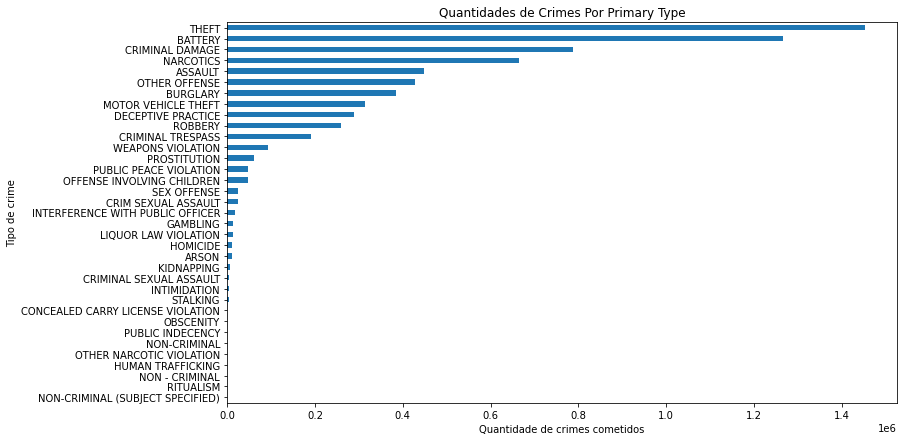

In [15]:
plt.figure(figsize=(12,7))
df.groupby('Primary Type').size().sort_values(ascending=True).plot(kind='barh')
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de crime')
plt.xlabel('Quantidade de crimes cometidos')
plt.show()

Rankeamento de registros por tipo de crime

##### Os crimes menos cometidos serão atbuidos a "others"

In [16]:
other_crimes = df.groupby(['Primary Type']).size().rename('n').sort_values(ascending=False).tail(13).reset_index()

df.loc[df['Primary Type'].isin(other_crimes['Primary Type']), 'Primary Type'] = 'OTHERS'

df['Primary Type'] = df['Primary Type'].str.replace('CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT')

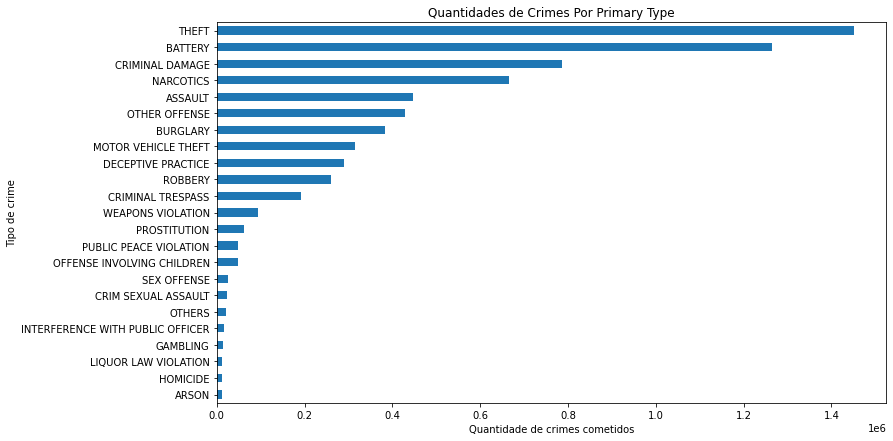

In [17]:
plt.figure(figsize=(12,7))
df.groupby('Primary Type').size().sort_values(ascending=True).plot(kind='barh')
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de crime')
plt.xlabel('Quantidade de crimes cometidos')
plt.show()

In [18]:
lae = LabelEncoder()

df['Primary Type'] = lae.fit_transform(df['Primary Type'])
target_names = lae.classes_

##### Verificando a correlação entre variáveis

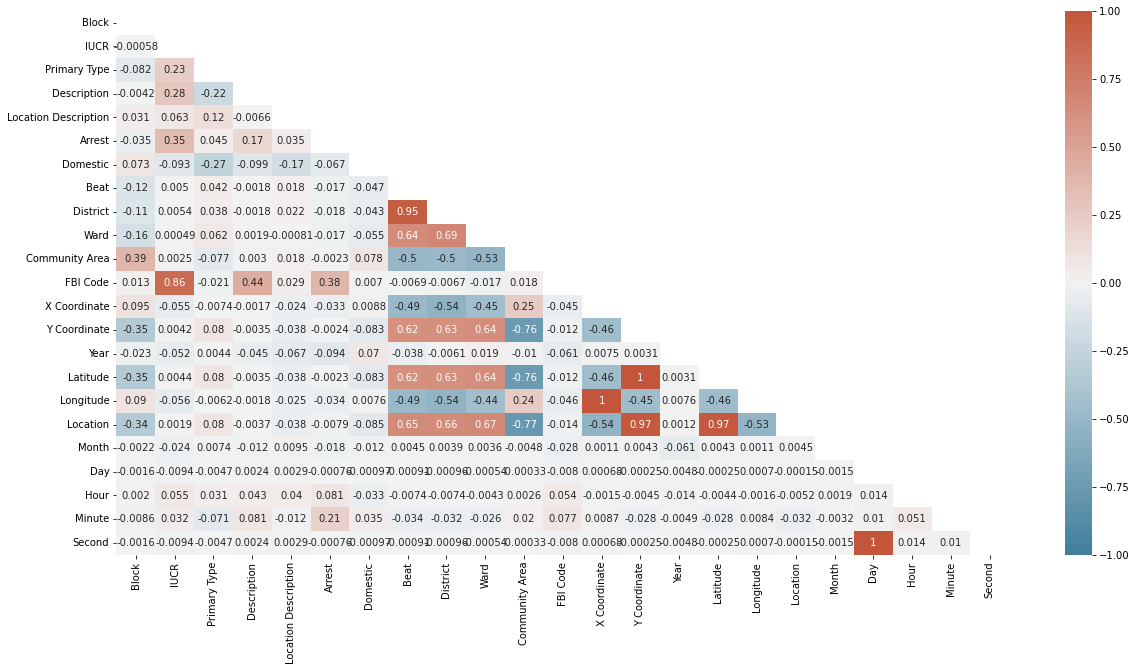

In [19]:
plt.figure(figsize=(20, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

O coeficiente de correlação possui valores entre -1 e 1

Um valor mais próximo de 0 implica correlação mais fraca (0 exato não implica correlação)
Um valor próximo de 1 implica correlação positiva mais forte
Um valor mais próximo de -1 implica correlação negativa mais forte

    - 0.00 até 0.19 correlação inexistente ou muito fraca
    - 0.20 até 0.39 correlação fraca
    - 0.40 até 0.69 correlação moderada
    - 0.70 até 0.89 correlação forte 
    - 0.90 até 1.0 correlação muito forte

##### Selecionando as features manualmente utilizando a correlação

In [20]:
corr_target = abs(corr['Primary Type'])
features = corr_target[corr_target > 0.2].reset_index()['index']
features = [f for f in features if f !='Primary Type']
features

['IUCR', 'Description', 'Domestic']

##### Dividir Dataframe em Features e Target

In [21]:
# pegando apenas uma fração do dataset
df = df.sample(n=200000, random_state=3, replace=False)

X = df.drop('Primary Type', axis=1)
y = df['Primary Type']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=3, stratify=y)

#### Criando modelo de arvore aleatória

In [23]:
model_rfc = RandomForestClassifier(n_estimators=70,
                                   min_samples_split = 30,
                                   bootstrap = True, 
                                   max_depth = 50, 
                                   min_samples_leaf = 25)

model_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=25, min_samples_split=30,
                       n_estimators=70)

In [24]:
predict = model_rfc.predict(x_test)

In [25]:
acc_score = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average='micro')
recall = recall_score(y_test, predict, average='weighted')
precision = precision_score(y_test, predict, average='weighted')
cmf = confusion_matrix(y_test, predict)

In [26]:
print('#### Random Forest Classifier ####\n')
print(f'Accuracy: {acc_score}')
print(f'F1 Score: {f1}')
print(f'Recall : {recall}')
print(f'Precision score: {precision}')

#### Random Forest Classifier ####

Accuracy: 0.997825
F1 Score: 0.997825
Recall : 0.997825
Precision score: 0.9978965825104816


In [27]:
print(classification_report(y_test, predict, target_names=target_names))

                                  precision    recall  f1-score   support

                           ARSON       1.00      0.95      0.98        64
                         ASSAULT       1.00      1.00      1.00      2615
                         BATTERY       1.00      1.00      1.00      7390
                        BURGLARY       1.00      1.00      1.00      2214
             CRIM SEXUAL ASSAULT       0.82      1.00      0.90       145
                 CRIMINAL DAMAGE       1.00      1.00      1.00      4579
               CRIMINAL TRESPASS       1.00      1.00      1.00      1128
              DECEPTIVE PRACTICE       1.00      1.00      1.00      1689
                        GAMBLING       1.00      0.96      0.98        74
                        HOMICIDE       1.00      0.91      0.95        76
INTERFERENCE WITH PUBLIC OFFICER       1.00      0.91      0.95       104
            LIQUOR LAW VIOLATION       1.00      1.00      1.00        72
             MOTOR VEHICLE THEFT     

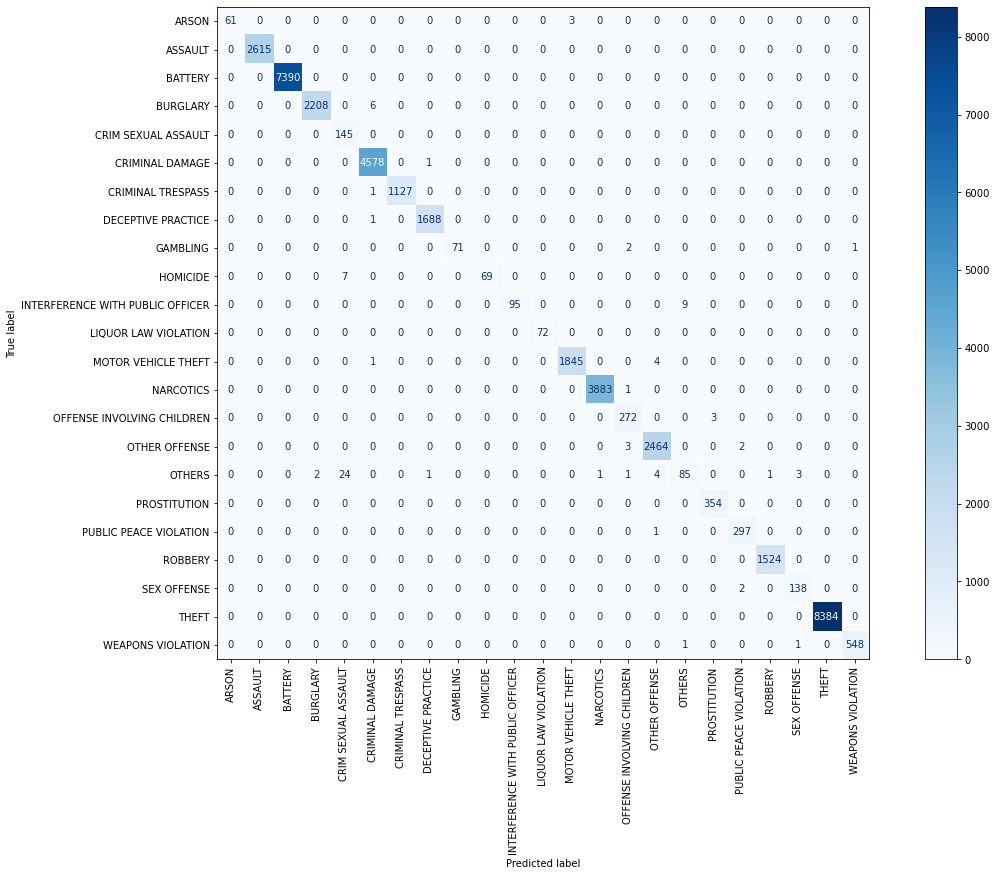

In [28]:
fig, ax = plt.subplots(figsize=(20,12))
cmap = plt.cm.Blues
cmp = ConfusionMatrixDisplay(cmf, display_labels=target_names)
cmp.plot(ax=ax, cmap=cmap)
plt.xticks(rotation=90)
plt.show()

#### Criando modelo de rede neural

In [29]:
model_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40,), random_state=1, max_iter=1000)
model_mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40,), max_iter=1000,
              random_state=1)

In [30]:
predict = model_mlp.predict(x_test)

In [31]:
acc_score = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average='micro')
recall = recall_score(y_test, predict, average='weighted')
precision = precision_score(y_test, predict, average='weighted')
cmf = confusion_matrix(y_test, predict)

In [32]:
print('#### MLP Classifier ####\n')
print(f'Accuracy: {acc_score}')
print(f'F1 Score: {f1}')
print(f'Recall : {recall}')
print(f'Precision score: {precision}')

#### MLP Classifier ####

Accuracy: 0.9832
F1 Score: 0.9832
Recall : 0.9832
Precision score: 0.9849688464791708


In [33]:
print(classification_report(y_test, predict, target_names=target_names))

                                  precision    recall  f1-score   support

                           ARSON       1.00      1.00      1.00        64
                         ASSAULT       1.00      1.00      1.00      2615
                         BATTERY       1.00      1.00      1.00      7390
                        BURGLARY       1.00      1.00      1.00      2214
             CRIM SEXUAL ASSAULT       0.88      1.00      0.94       145
                 CRIMINAL DAMAGE       0.99      0.97      0.98      4579
               CRIMINAL TRESPASS       0.91      1.00      0.95      1128
              DECEPTIVE PRACTICE       1.00      0.99      0.99      1689
                        GAMBLING       1.00      0.92      0.96        74
                        HOMICIDE       1.00      1.00      1.00        76
INTERFERENCE WITH PUBLIC OFFICER       0.73      0.35      0.47       104
            LIQUOR LAW VIOLATION       0.95      0.76      0.85        72
             MOTOR VEHICLE THEFT     

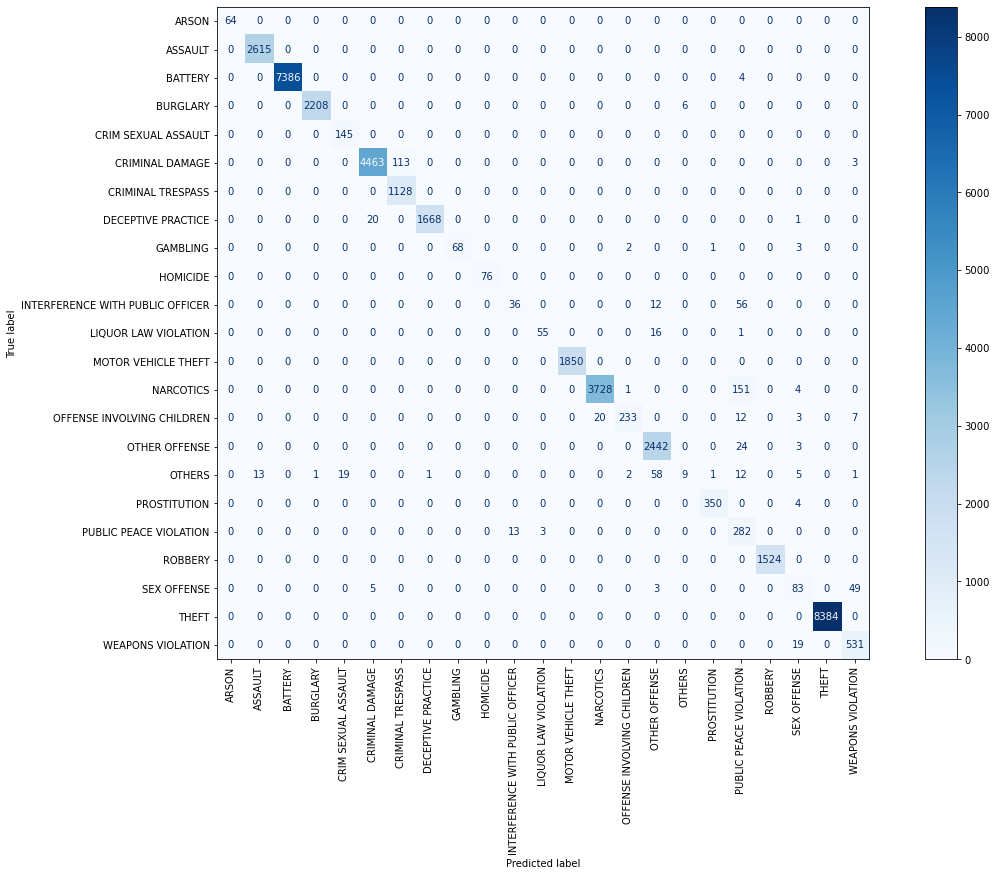

In [34]:
fig, ax = plt.subplots(figsize=(20,12))
cmap = plt.cm.Blues
cmp = ConfusionMatrixDisplay(cmf, display_labels=target_names)
cmp.plot(ax=ax, cmap=cmap)
plt.xticks(rotation=90)
plt.show()

##### Criando modelo KNN

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
predict = model_knn.predict(x_test)

In [37]:
acc_score = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average='micro')
recall = recall_score(y_test, predict, average='weighted')
precision = precision_score(y_test, predict, average='weighted')
cmf = confusion_matrix(y_test, predict)

In [38]:
print('#### KNN Classifier ####\n')
print(f'Accuracy: {acc_score}')
print(f'F1 Score: {f1}')
print(f'Recall : {recall}')
print(f'Precision score: {precision}')

#### KNN Classifier ####

Accuracy: 0.999325
F1 Score: 0.999325
Recall : 0.999325
Precision score: 0.9993809189404945


In [39]:
print(classification_report(y_test, predict, target_names=target_names))

                                  precision    recall  f1-score   support

                           ARSON       0.98      1.00      0.99        64
                         ASSAULT       1.00      1.00      1.00      2615
                         BATTERY       1.00      1.00      1.00      7390
                        BURGLARY       1.00      1.00      1.00      2214
             CRIM SEXUAL ASSAULT       0.88      1.00      0.94       145
                 CRIMINAL DAMAGE       1.00      1.00      1.00      4579
               CRIMINAL TRESPASS       1.00      1.00      1.00      1128
              DECEPTIVE PRACTICE       1.00      1.00      1.00      1689
                        GAMBLING       1.00      0.96      0.98        74
                        HOMICIDE       1.00      1.00      1.00        76
INTERFERENCE WITH PUBLIC OFFICER       1.00      1.00      1.00       104
            LIQUOR LAW VIOLATION       1.00      0.99      0.99        72
             MOTOR VEHICLE THEFT     

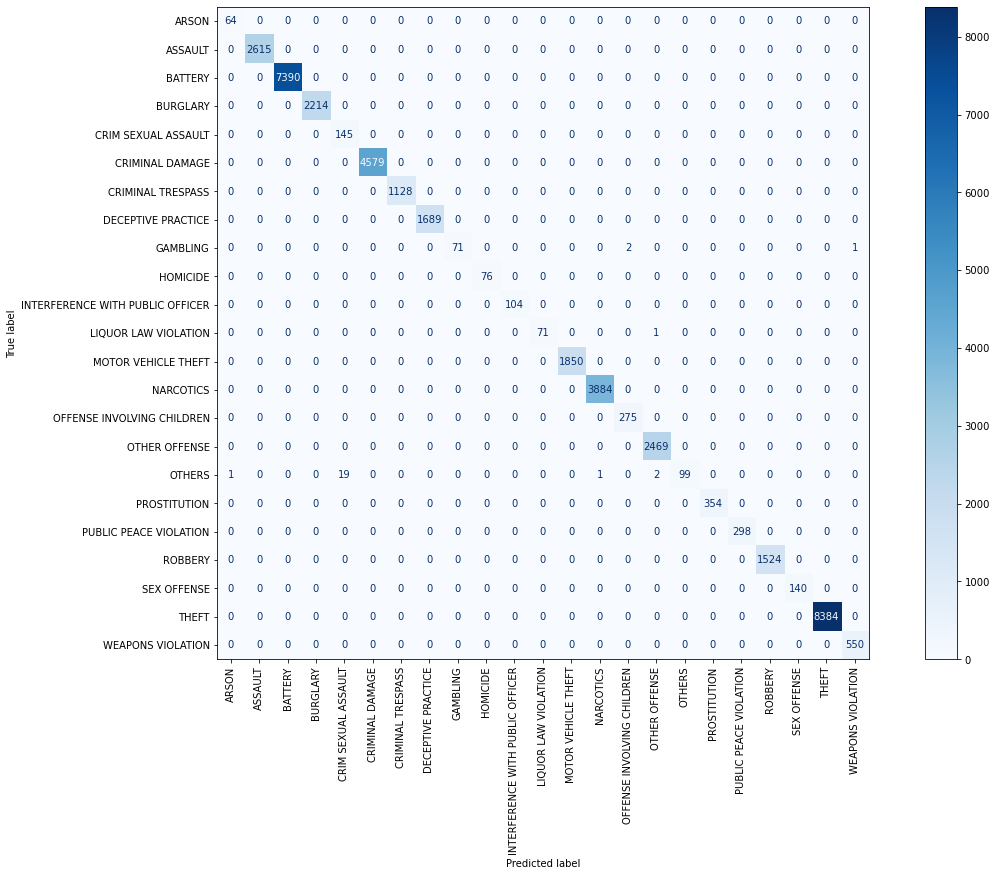

In [40]:
fig, ax = plt.subplots(figsize=(20,12))
cmap = plt.cm.Blues
cmp = ConfusionMatrixDisplay(cmf, display_labels=target_names)
cmp.plot(ax=ax, cmap=cmap)
plt.xticks(rotation=90)
plt.show()

##### Criando VotingModel

In [41]:
model_voting = VotingClassifier(estimators=[('knn', model_knn), 
                                             ('rf', model_rfc), 
                                             ('nn', model_mlp)], 
                                 weights=[1,1,1])

In [42]:
model_voting.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     min_samples_leaf=25,
                                                     min_samples_split=30,
                                                     n_estimators=70)),
                             ('nn',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(40,),
                                            max_iter=1000, random_state=1))],
                 weights=[1, 1, 1])

In [43]:
predict = model_voting.predict(x_test)

In [44]:
acc_score = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average='micro')
recall = recall_score(y_test, predict, average='weighted')
precision = precision_score(y_test, predict, average='weighted')
cmf = confusion_matrix(y_test, predict)

In [45]:
print('#### Voting Classifier ####\n')
print(f'Accuracy: {acc_score}')
print(f'F1 Score: {f1}')
print(f'Recall : {recall}')
print(f'Precision score: {precision}')

#### Voting Classifier ####

Accuracy: 0.999
F1 Score: 0.999
Recall : 0.999
Precision score: 0.9990586301786775
